# Venture investment per state for 2017

Lets have a look the how many Venture Dollars we invested in each state in 2017 (we only have data until Q3 2018 so I thought it wasn't as good). 
Naturally California will dominate in any absolute numbers - but lets see how things play out on a per capita basis.

Notes on data:

  1. VC data comes from the [PitchBook Venture Monitor](https://pitchbook.com/news/reports/3q-2018-pitchbook-nvca-venture-monitor)
  2. Population data comes from the [USA Census Bureau](https://www2.census.gov/programs-surveys/popest/tables/2010-2018/state/totals/nst-est2018-01.xlsx)
  
  
The graphs are interactive and were made using Plotly, you can see the code cells by clicking the Code Visiblity dropdown on the top right of this document.

In [35]:
import pandas as pd
%run plot.ipynb

In [5]:
df_num = pd.read_excel('./data/PitchBook_NVCA_3Q_2018_Venture_Monitor_Summary_XLS.xlsx', 
              sheet_name="Deals by State",
              skiprows=5,
              usecols=[i for i in range(17, 1000)],
             )

df_num.set_index('Unnamed: 0', inplace=True)

In [6]:
names = [state_codes[x] if (x in state_codes) else x for x in df_num.index.values]

In [7]:
df_val = pd.read_excel('./data/PitchBook_NVCA_3Q_2018_Venture_Monitor_Summary_XLS.xlsx', 
              sheet_name="Deals by State",
              skiprows=5,
              usecols=[i for i in range(1, 15)],
             )

df_val.set_index('Unnamed: 0', inplace=True)

In [8]:
df_pop = pd.read_excel('https://www2.census.gov/programs-surveys/popest/tables/2010-2018/state/totals/nst-est2018-01.xlsx', skiprows=3, skipfooter=5)
df_pop.set_index('Unnamed: 0', inplace=True)
df_pop = df_pop[pd.notna(df_pop.index)]
df_pop.index = [x.replace('.', '') for x in  df_pop.index.values]

## Chloropleth Plot VC Dollars per state per capita

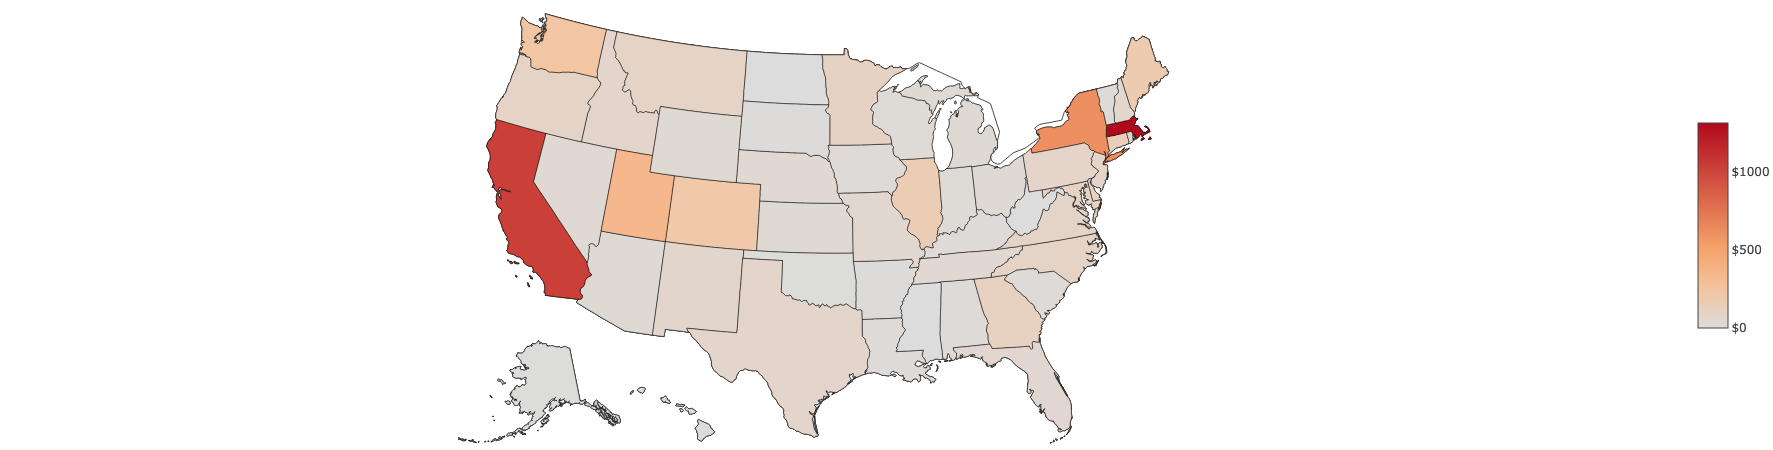

In [27]:
usd_per_capita = df_val[2017] * 1000000 / df_pop[2017]
usd_per_capita = usd_per_capita[df_val.index]
usd_per_capita = usd_per_capita[pd.notna(usd_per_capita)]

names = [state_codes[x] if (x in state_codes) else x for x in usd_per_capita.index.values]

make_plot(locations=names, z=usd_per_capita, tickprefix="$")

Nothing out of the ordinary but it doesn't give us much insight into whats happening outside California, New York or Massachusetts. Lets do a bar chart.

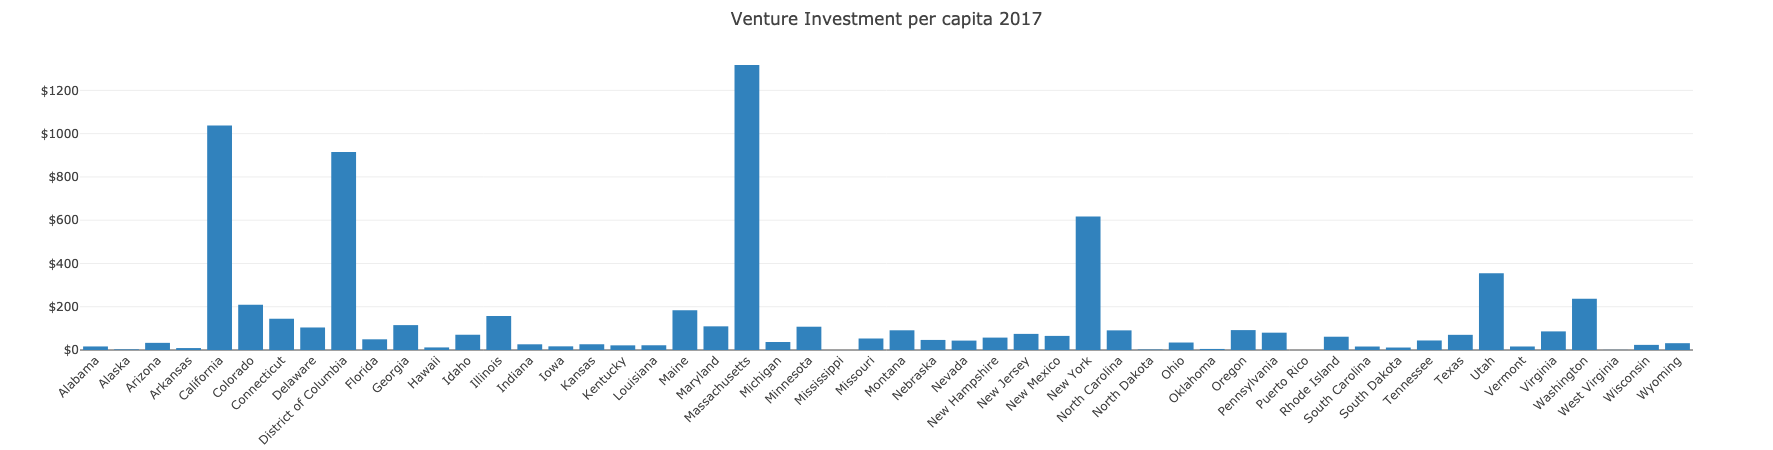

In [36]:
trace0 = go.Bar(
    x=usd_per_capita.index,
    y=usd_per_capita,
    name='Primary Product',
    marker=dict(
        color='rgb(49,130,189)'
    )
)

layout = go.Layout(
    xaxis=dict(tickangle=-45),
    yaxis=dict(tickprefix="$"),
    barmode='group',
    margin={"t": 50, "b": 100},
    title="Venture Investment per capita 2017",
)

fig = go.Figure(data=[trace0], layout=layout)
iplot(fig)

Pretty cool, we can see that Massachusetts was actually the "winner" that year, and that DC does really well, and also Utah recieved a lot of \$\$ which I didnt expect